In [52]:
import pandas as pd
import seaborn as sns
import json
from sqlalchemy import create_engine

# Data Visualisation:

In [53]:
# Establish MySQL connection:

with open("db_login.json", "r") as f:
    login = json.load(f)

engine = create_engine(f"mysql+pymysql://{login['user']}:{login['pass']}@{login['host']}/{login['db_name']}",
                        connect_args={"ssl":{"fake_flag_to_enable_tls":True}})

#### 1. Which product offering is performing better?

In [54]:
with open("queries/sales_per_product.sql", 'r') as f:
    query_1 = f.read()

df_1 = pd.read_sql(query_1, engine)
df_1

,product,SUM(quantity)
0,toothbrush,39.0
1,toys,27.0


<AxesSubplot:xlabel='Product', ylabel='Sales volume'>

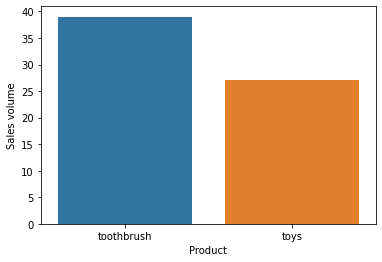

In [55]:
df_1.rename(columns={'SUM(quantity)':'Sales volume', 'product':'Product'}, inplace=True)
sns.barplot(x="Product", y="Sales volume", data=df_1)

Overall, toothbrushes are performing substantially better.

#### 2. Demographic information:

In [56]:
del df_1

with open("queries/purchaser_ages.sql", 'r') as f:
    query_2_a = f.read()

df_2_a = pd.read_sql(query_2_a, engine)

with open("queries/purchaser_regions.sql", 'r') as f:
    query_2_b = f.read()

df_2_b = pd.read_sql(query_2_b, engine)

df_2_a.rename(columns={'COUNT(order_id)':'Order volume', 'product':'Product', 'age':'Purchaser age'}, inplace=True)
df_2_b.rename(columns={'COUNT(order_id)':'Order volume', 'product':'Product', 'uk_region':'Purchaser region'}, inplace=True)

<AxesSubplot:xlabel='Purchaser age', ylabel='Order volume'>

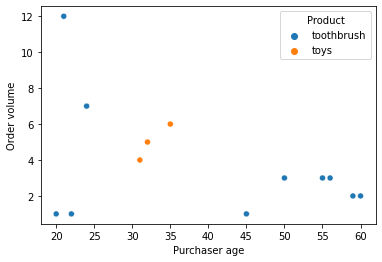

In [57]:
sns.scatterplot(x="Purchaser age", y="Order volume", data=df_2_a, hue="Product")

We can see that for toothbrushes, purchasers are highly likely to be in their early 20s, with another pickup in orders in the 45-60 age demographic. Toys are generally purchased by those in their early 30s.

<AxesSubplot:xlabel='Purchaser region', ylabel='Order volume'>

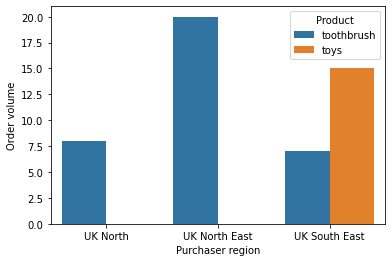

In [58]:
sns.barplot(x="Purchaser region", y="Order volume", data=df_2_b, hue="Product")

We can see that toothbrushes were sold in all regions except UK South, where there were no sales in the sample data. Toothbrushes were most popular in the North East, while toys were sold exclusively in the South East, where they were more popular than toothbrushes.

#### 3. Are sales seasonal?

<AxesSubplot:xlabel='Month', ylabel='Sales volume'>

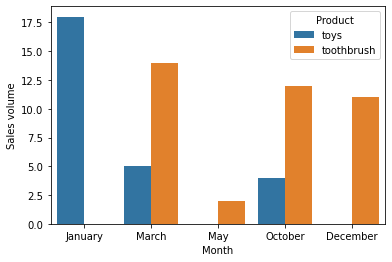

In [59]:
del df_2_a, df_2_b

with open("queries/sales_per_month.sql", 'r') as f:
    query_3 = f.read()

df_3 = pd.read_sql(query_3, engine)

df_3.rename(columns={'SUM(quantity)':'Sales volume', 'product':'Product', 'MONTHNAME(order_month)':'Month'}, inplace=True)

sns.barplot(x="Month", y="Sales volume", data=df_3, hue="Product")

We have no sales during the summer months at all, and very little during the spring, with 2 sales in May. Toothbrush sales don't appear to follow a recognisable seasonal pattern, and in any case it is hard to establish any consistent seasonal trends as we only have data for a single year. Toy spend appears to peak significantly during January, with only sporadic purchases in March and October otherwise.

#### 4. Is our marketing spend justified?

We have no statistics for total sales volume as we only have a small sample dataset, so we have nothing to compare the marketing spend figure of £200,000,000 to. The sample data shows no sales for UK South, so if this is reflected in the whole dataset then the spend on marketing activities in this region is nearly unjustifiable. 

#### 5. CPA by region

Our source website https://mystaticwebsite-3.s3.amazonaws.com/index.html contains data for October 2021 only, so we compare CPA during that month only.

<AxesSubplot:xlabel='Region', ylabel='CPA saving relative to the regional average / £'>

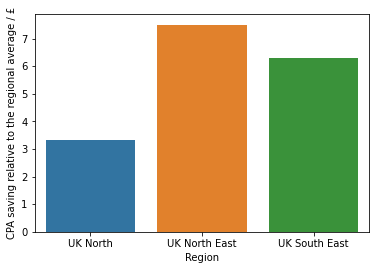

In [60]:
del df_3

with open("queries/cpa_relative_to_research.sql", 'r') as f:
    query_5 = f.read()

df_5 = pd.read_sql(query_5, engine)

df_5.rename(columns={'above_average_cpa':'CPA saving relative to the regional average / £', 'uk_region':'Region'}, inplace=True)

sns.barplot(x="Region", y="CPA saving relative to the regional average / £", data=df_5)

We can see that our CPA for October 2021 is well under the average for all regions, with particularly great savings in the North East.

In [61]:
del df_5